In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [15]:
df=pd.read_csv('Mall_Customers.csv')

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

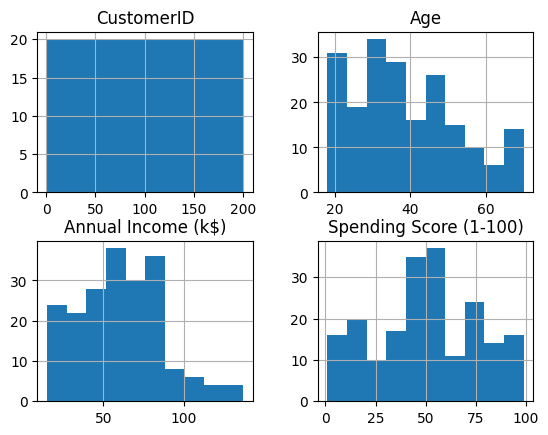

In [5]:
df['Spending Score (1-100)'].value_counts()
df.hist()

In [6]:
df.isnull().sum()
df.duplicated().sum()

0

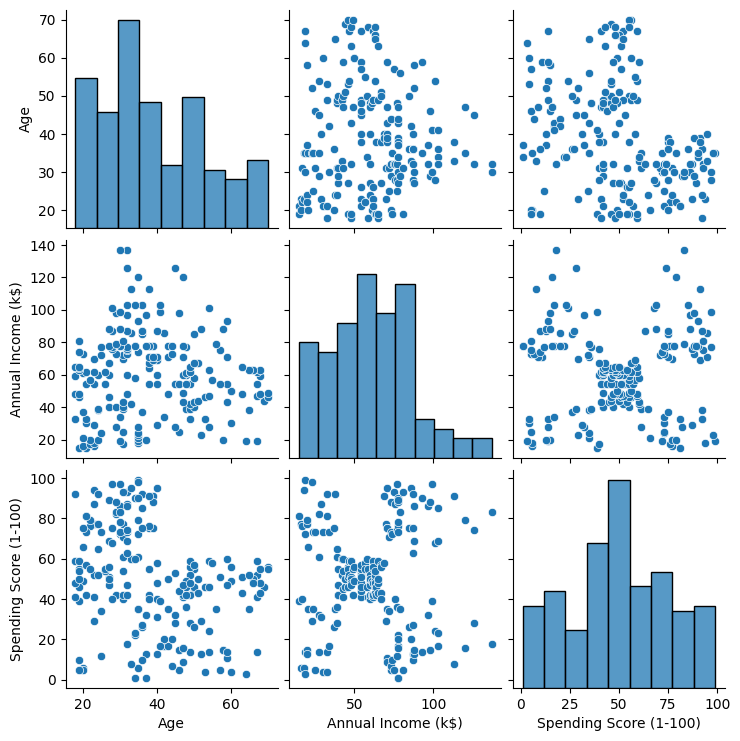

In [7]:
import seaborn as sns
sns.pairplot(df[['Age','Annual Income (k$)', 'Spending Score (1-100)']])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['Annual Income (k$)', 'Spending Score (1-100)']
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,-1.738999,-0.434801
1,2,Male,21,-1.738999,1.195704
2,3,Female,20,-1.700830,-1.715913
3,4,Female,23,-1.700830,1.040418
4,5,Female,31,-1.662660,-0.395980


In [16]:
df.drop(['CustomerID','Gender','Age'], axis=1, inplace=True)


In [17]:
from sklearn.cluster import KMeans
sse = [] #SUM OF SQUARED ERROR
k_rng = range(1,11)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

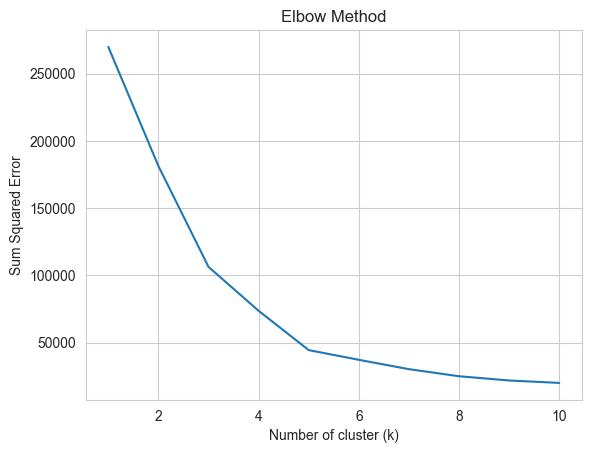

In [18]:
import matplotlib.pyplot as plt 
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()


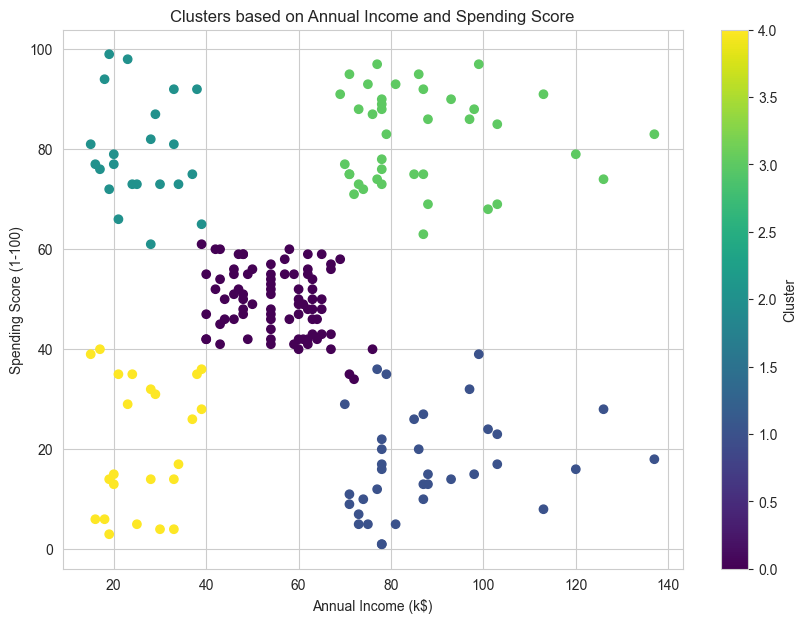

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
y_pred = kmeans.labels_
df['Cluster'] = y_pred
import matplotlib.pyplot as plt

# Create a 2D scatter plot
plt.figure(figsize=(10, 7))

# Plot data points with color based on their cluster
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', marker='o')

# Set labels
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# Add title
plt.title('Clusters based on Annual Income and Spending Score')

# Add color bar
plt.colorbar(label='Cluster')

# Show plot
plt.show()

Text(0, 0.5, 'Euclidean distance')

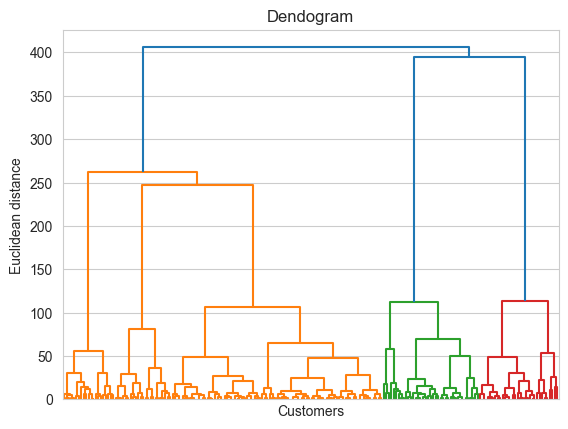

In [20]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(df, method='ward', metric='euclidean'), no_labels=True)
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')
hc.fit(df)


AgglomerativeClustering(affinity='euclidean', n_clusters=5)

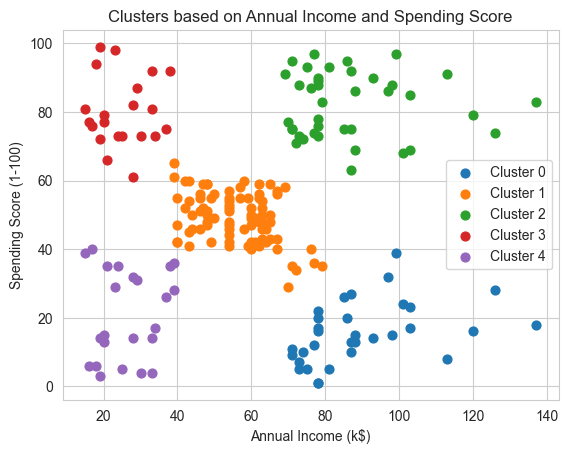

In [22]:
import matplotlib.pyplot as plt

# Assuming hc.labels_ contains the cluster labels and df is your DataFrame
# Here, df[['Annual Income (k$)', 'Spending Score (1-100)']] is used as the 2D data
for i in range(len(set(hc.labels_))):  # or range(hc.n_clusters_) if you have the number of clusters
    plt.scatter(
        df[hc.labels_ == i]['Annual Income (k$)'],
        df[hc.labels_ == i]['Spending Score (1-100)'],
        s=40,
        label='Cluster ' + str(i)
    )

plt.title('Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()